<a href="https://colab.research.google.com/github/rajy4683/S15Test/blob/master/S15Unet_Expand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Mon May 18 20:08:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')
sys.path.append('/content/drive/My Drive/EVA4')
sys.path.append('/content/drive/My Drive/EVA4/DenseDepth')

### Dependencies


In [0]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 2.7MB/s 
     |████████████████████████████████| 1.4MB 4.8MB/s 
     |████████████████████████████████| 163kB 11.1MB/s 
     |████████████████████████████████| 112kB 15.0MB/s 
     |████████████████████████████████| 102kB 7.2MB/s 
     |████████████████████████████████| 460kB 11.2MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 634kB 16.7MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=24e9ebb57dd80cd81a18a32ca9f621c1ffd261e1446a8801ca4d1555914b8e33
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=734b2213b2f26f9a8a147581359a152a36838899bba709124a0b4eca693594c3
  Stored in directory: /root/.cache

In [0]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-2v0_uj_z
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-2v0_uj_z
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65055 sha256=bb22fa3984298c818eaf1dd0cfba41383201170d89bf924f054fc122a05301ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-zra4dt2x/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [0]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random
from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import pandas as pd

import torch
from zipfile import ZipFile
import re
import h5py
import time



In [0]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
import torchvision.transforms as transforms
from RekogNizer import hyperparams


from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg, IAAFliplr,
	IAAPerspective,
)
from albumentations.pytorch import ToTensor
import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np
from torchvision import datasets
#from RekogNizer import imgnetloader
from RekogNizer import basemodelclass
from RekogNizer import mmdlrfinder

from RekogNizer import mmdtraintest
from RekogNizer import mmddataloader
from RekogNizer import mmdlosses
from RekogNizer import mmdmodels

from RekogNizer import hyperparams
from RekogNizer import fileutils

from torch.utils.data import Dataset
import shutil
from tqdm import tqdm
from RekogNizer import mmdmodels

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR, MultiStepLR, CyclicLR, ReduceLROnPlateau


import kornia

import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import wandb

  pip install torch-lr-finder -v --global-option="amp"
  pip install torch-lr-finder -v --global-option="amp"


## Mask Image (Mean and Variance
Mask Mean:0.057950844077600344, Mask StdDev:0.0016620444341229432
### Depth mean and Variance
Depth Mean:0.3679109312239146, Depth StdDev:0.03551773442719045

In [0]:
!rm -rf /content/train && mkdir -p /content/train
!rm -rf /content/test && mkdir -p /content/test

In [0]:
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
batch_start = 90000
batch_end = batch_start+30000
dest_dir="/content/train"

mmddataloader.extract_data_files_mt(csv_file, root_dir, batch_start,batch_end, dest_dir=dest_dir)


Extracting image and mask files Total:9


  0%|          | 0/13 [13:25<?, ?it/s]

  0%|          | 0/13 [13:26<?, ?it/s]


Zip Name:image_mask_gt1k2k.zip Total Files:10076
Zip Name:image_mask_gt6k8k.zip Total Files:9838


  0%|          | 0/13 [13:30<?, ?it/s]


Zip Name:depth_mask_gt_1k2k.zip Total Files:5038
Zip Name:image_mask_gt2k6k.zip Total Files:19458
Zip Name:image_mask_gt8k12k.zip Total Files:20630


  0%|          | 0/13 [13:40<?, ?it/s]


Zip Name:depth_mask_gt_2k6k.zip Total Files:9729


  0%|          | 0/13 [13:43<?, ?it/s]


Zip Name:depth_mask_gt_6k8k.zip Total Files:4919


  0%|          | 0/13 [13:53<?, ?it/s]


Zip Name:depth_mask_gt_8k12k.zip Total Files:10315
Extracting bg files
Total file count:90113 


In [0]:
size_hw = (224,224)
dest_dir="/content/train"
train_batch_size = 32
depth_dataset = mmddataloader.DepthMaskDataSet(csv_file, dest_dir, batch_start,batch_end, read_zip=False,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':4,'pin_memory': True}
train_loader = DataLoader(depth_dataset, batch_size=train_batch_size, shuffle=False, **kwargs)

In [0]:
test_csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTest.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
test_batch_start = 0
test_batch_end = test_batch_start + 512
test_dest_dir = "/content/test"

mmddataloader.extract_data_files(test_csv_file, root_dir, test_batch_start,test_batch_end, dest_dir=test_dest_dir)

Extracting image and mask files


image_mask_gt1k2k.zip: 100%|██████████| 1026/1026 [00:34<00:00, 29.97it/s]


Extracting depth files


depth_mask_gt_1k2k.zip: 100%|██████████| 513/513 [00:42<00:00, 11.97it/s]

Extracting bg files
Total file count:1556 


In [0]:
iter(train_loader).next()['input'].shape

torch.Size([101, 6, 56, 56])

In [0]:
size_hw = (224,224)
test_dest_dir = "/content/test"
test_batch_size=8
test_dataset = mmddataloader.DepthMaskDataSet(test_csv_file, test_dest_dir, test_batch_start,test_batch_end,read_zip=False,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':4,'pin_memory': True}
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, **kwargs)

In [0]:
from RekogNizer import mmdtraintest
from RekogNizer import mmdlosses

criterion={"mask":[mmdlosses.LocalBCELoss, mmdlosses.LocalSSIMLoss ], 
           "depth":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss]}

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalSSIMLoss ], "depth":[mmdlosses.LocalRMSELoss]}
#model = basemodelclass.MonoMaskDepthResNetFunc()
optimizer=optim.SGD(model_new.parameters(), lr=0.001,momentum=0.9,  weight_decay=0)
lrfinder = mmdtraintest.find_lr_type1(model_new, optimizer, criterion, train_loader, testloader=None, seed=1, start_lr=0.0001, end_lr=1, step_mode="exp",num_iter=100)



Learning rate search finished. See the graph with {finder_name}.plot()


0.02754228703338166 1.0 0.8153246641159058
{'lr': [0.00010964781961431851, 0.0001202264434617413, 0.0001318256738556407, 0.00014454397707459274, 0.00015848931924611136, 0.00017378008287493755, 0.00019054607179632473, 0.00020892961308540398, 0.00022908676527677731, 0.000251188643150958, 0.0002754228703338166, 0.00030199517204020164, 0.00033113112148259116, 0.0003630780547701014, 0.00039810717055349724, 0.00043651583224016605, 0.00047863009232263843, 0.0005248074602497726, 0.000575439937337157, 0.0006309573444801934, 0.0006918309709189364, 0.0007585775750291837, 0.0008317637711026711, 0.0009120108393559097, 0.001, 0.0010964781961431851, 0.0012022644346174132, 0.0013182567385564075, 0.0014454397707459273, 0.0015848931924611134, 0.0017378008287493754, 0.0019054607179632473, 0.00208929613085404, 0.0022908676527677737, 0.0025118864315095794, 0.0027542287033381664, 0.003019951720402016, 0.0033113112148259113, 0.0036307805477010144, 0.003981071705534973, 0.004365158322401658, 0.004786300923226

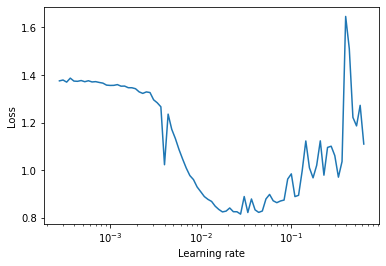

In [0]:
min_lr = lrfinder.history['lr'][np.argmin(lrfinder.history['loss'])]
max_lr = np.max(lrfinder.history['lr'])
print(min_lr, max_lr, np.min(lrfinder.history['loss']))
print(lrfinder.history)
lrfinder.plot()

In [0]:
summary(model_new, input_size=(6,64,64)  )

In [0]:
del model
torch.cuda.empty_cache()

In [0]:
lrfinder.reset()

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

model_new = mmdtraintest.load_model_for_infer(model_new, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-d4f23f75a2.h5',
                                  device)

In [0]:
expand_model  =mmdmodels.CustomUNet(model_new,n_channels=6, n_classes=2)

#summary(expand_model.to(device),input_size=(6,224,224))

In [0]:
for parameter in model_new.parameters():
    print(parameter.requires_grad)# = False

In [0]:
expand_model.named_parameters()

In [0]:
from RekogNizer import mmdlosses
from RekogNizer import mmdtraintest
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
#hyperparams.set_hyperparam({"epochs":3})
#tqdm._instances.clear()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['lr'] = 0.019054607179632466 #0.03381790256192963 #0.008912509381337455 
print("Initializing datasets and dataloaders")    

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss], "depth":[mmdlosses.LocalRMSELoss]}
criterion={"mask":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss ], 
           "depth":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss]}

wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")
#criterion={"mask":[mmdlosses.LocalBCELoss, mmdlosses.dice_loss], "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}
#trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=0)


#criterion=mmdlosses.bce_with_rmse

#print("Momentum cycling set to {}".format(cycle_momentum))
#scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)  
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)

final_model_path = mmdtraintest.execute_model(model_new, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=False)


In [0]:
from RekogNizer import mmdlosses
from RekogNizer import mmdtraintest
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
#hyperparams.set_hyperparam({"epochs":3})
tqdm._instances.clear()
hyperparams.hyperparameter_defaults['epochs'] = 10
hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['lr'] = 0.1 #0.02754228703338166 #0.03381790256192963 #0.008912509381337455 
print("Initializing datasets and dataloaders")    

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss], "depth":[mmdlosses.LocalRMSELoss]}
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}


wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, project=hyperparams.hyperparameter_defaults['project'])
wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")
#criterion={"mask":[mmdlosses.LocalBCELoss, mmdlosses.dice_loss], "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}
#trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=0)


#criterion=mmdlosses.bce_with_rmse

#print("Momentum cycling set to {}".format(cycle_momentum))
#scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)  
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)

final_model_path = mmdtraintest.execute_model(model_new, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=False)

Initializing datasets and dataloaders


  0%|          | 0/938 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 10
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.1
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.5
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 34bdd76128
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: null
  val

loss=1.909960 m_loss=1.524045 d_loss=0.385915 batch_id=937: 100%|██████████| 938/938 [08:54<00:00,  1.75it/s]
loss=1.8353677988052368 batch_id=32: 100%|██████████| 33/33 [00:06<00:00,  4.93it/s]



Epoch: 1 Train set: Average loss: 0.058525, Mask loss:0.011673, Depth loss:0.046852, lr:0
Epoch: 1 Test set: Average loss: 0.121107, Mask loss:0.096427, Depth loss:0.024680
Model saved as Test loss reduced from  10000.0  to  0.1211073586815282


  0%|          | 0/938 [00:00<?, ?it/s]

Non CyclicLR Case


loss=1.909959 m_loss=1.524045 d_loss=0.385915 batch_id=937: 100%|██████████| 938/938 [08:53<00:00,  1.76it/s]
loss=1.8353650569915771 batch_id=32: 100%|██████████| 33/33 [00:06<00:00,  4.90it/s]



Epoch: 2 Train set: Average loss: 0.058524, Mask loss:0.011672, Depth loss:0.046852, lr:0
Epoch: 2 Test set: Average loss: 0.121107, Mask loss:0.096427, Depth loss:0.024680
Model saved as Test loss reduced from  0.1211073586815282  to  0.12110718951123035


  0%|          | 0/938 [00:00<?, ?it/s]

Non CyclicLR Case


loss=1.909958 m_loss=1.524045 d_loss=0.385914 batch_id=937: 100%|██████████| 938/938 [08:53<00:00,  1.76it/s]
loss=1.835360050201416 batch_id=32: 100%|██████████| 33/33 [00:06<00:00,  4.94it/s]



Epoch: 3 Train set: Average loss: 0.058524, Mask loss:0.011672, Depth loss:0.046852, lr:0
Epoch: 3 Test set: Average loss: 0.121107, Mask loss:0.096427, Depth loss:0.024680
Model saved as Test loss reduced from  0.12110718951123035  to  0.12110708935683698


  0%|          | 0/938 [00:00<?, ?it/s]

Non CyclicLR Case


loss=1.880916 m_loss=1.494764 d_loss=0.386151 batch_id=94:  10%|█         | 95/938 [00:54<08:01,  1.75it/s]

In [0]:
model_new_params = ['baseUNet.'+param[0] for param in list(model_new.named_parameters()) ]
expand_model_params = [param[1] for param in list(expand_model.named_parameters()) if param[0] not in model_new_params]


In [0]:
len(model_new_params),len(expand_model_params), len(list(expand_model.parameters()))

(74, 19, 93)

In [0]:
len(expand_model_params)

19

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.1

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(expand_model_params, lr=config.lr,momentum=config.momentum,
                        weight_decay=0)
expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/938 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.1
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.015625
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 30956fe8a7
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: null


loss=0.984126 m_loss=0.870559 d_loss=0.113567 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.92it/s]
loss=1.0050880908966064 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.93it/s]



Epoch: 1 Train set: Average loss: 0.032050, Mask loss:0.004225, Depth loss:0.027825, lr:0
Epoch: 1 Test set: Average loss: 0.125995, Mask loss:0.111834, Depth loss:0.014161
Model saved as Test loss reduced from  10000.0  to  0.12599484358149896


loss=0.972210 m_loss=0.868258 d_loss=0.103952 batch_id=937: 100%|██████████| 938/938 [05:21<00:00,  2.92it/s]
loss=0.9991674423217773 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.96it/s]



Epoch: 2 Train set: Average loss: 0.030882, Mask loss:0.003276, Depth loss:0.027606, lr:0
Epoch: 2 Test set: Average loss: 0.124440, Mask loss:0.111605, Depth loss:0.012835
Model saved as Test loss reduced from  0.12599484358149896  to  0.12444016959002609


loss=0.960024 m_loss=0.866533 d_loss=0.093491 batch_id=937: 100%|██████████| 938/938 [05:21<00:00,  2.92it/s]
loss=0.9927904009819031 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.08it/s]



Epoch: 3 Train set: Average loss: 0.030581, Mask loss:0.003017, Depth loss:0.027564, lr:0
Epoch: 3 Test set: Average loss: 0.123782, Mask loss:0.111506, Depth loss:0.012276
Model saved as Test loss reduced from  0.12444016959002609  to  0.12378193493242617


loss=0.957566 m_loss=0.866217 d_loss=0.091349 batch_id=937: 100%|██████████| 938/938 [05:21<00:00,  2.92it/s]
loss=0.9896759390830994 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.00it/s]



Epoch: 4 Train set: Average loss: 0.030413, Mask loss:0.002873, Depth loss:0.027539, lr:0
Epoch: 4 Test set: Average loss: 0.123341, Mask loss:0.111452, Depth loss:0.011889
Model saved as Test loss reduced from  0.12378193493242617  to  0.12334070777335363


loss=0.954666 m_loss=0.865870 d_loss=0.088796 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.93it/s]
loss=0.979616641998291 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.99it/s]



Epoch: 5 Train set: Average loss: 0.030301, Mask loss:0.002778, Depth loss:0.027523, lr:0
Epoch: 5 Test set: Average loss: 0.123042, Mask loss:0.111407, Depth loss:0.011634
Model saved as Test loss reduced from  0.12334070777335363  to  0.12304181058039675


loss=0.951908 m_loss=0.865471 d_loss=0.086436 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.92it/s]
loss=0.9773314595222473 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.10it/s]



Epoch: 6 Train set: Average loss: 0.030203, Mask loss:0.002692, Depth loss:0.027510, lr:0
Epoch: 6 Test set: Average loss: 0.122684, Mask loss:0.111358, Depth loss:0.011326
Model saved as Test loss reduced from  0.12304181058039675  to  0.1226835615686041


loss=0.949967 m_loss=0.865201 d_loss=0.084766 batch_id=937: 100%|██████████| 938/938 [05:19<00:00,  2.93it/s]
loss=0.9732539057731628 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.09it/s]



Epoch: 7 Train set: Average loss: 0.030122, Mask loss:0.002623, Depth loss:0.027499, lr:0
Epoch: 7 Test set: Average loss: 0.122451, Mask loss:0.111343, Depth loss:0.011108
Model saved as Test loss reduced from  0.1226835615686041  to  0.12245141402555024


loss=0.948661 m_loss=0.865088 d_loss=0.083573 batch_id=937: 100%|██████████| 938/938 [05:21<00:00,  2.91it/s]
loss=0.9740604162216187 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.05it/s]



Epoch: 8 Train set: Average loss: 0.030064, Mask loss:0.002573, Depth loss:0.027491, lr:0
Epoch: 8 Test set: Average loss: 0.122298, Mask loss:0.111328, Depth loss:0.010970
Model saved as Test loss reduced from  0.12245141402555024  to  0.12229778985066256


loss=0.947346 m_loss=0.864963 d_loss=0.082383 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.92it/s]
loss=0.9746938943862915 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.03it/s]



Epoch: 9 Train set: Average loss: 0.030020, Mask loss:0.002535, Depth loss:0.027485, lr:0
Epoch: 9 Test set: Average loss: 0.122169, Mask loss:0.111317, Depth loss:0.010852
Model saved as Test loss reduced from  0.12229778985066256  to  0.1221693403307225


loss=0.946301 m_loss=0.864855 d_loss=0.081446 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.93it/s]
loss=0.9733645915985107 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.15it/s]



Epoch: 10 Train set: Average loss: 0.029984, Mask loss:0.002504, Depth loss:0.027480, lr:0
Epoch: 10 Test set: Average loss: 0.122072, Mask loss:0.111302, Depth loss:0.010770
Model saved as Test loss reduced from  0.1221693403307225  to  0.12207241481275354


loss=0.945809 m_loss=0.864803 d_loss=0.081005 batch_id=937: 100%|██████████| 938/938 [05:19<00:00,  2.93it/s]
loss=0.9724759459495544 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.08it/s]



Epoch: 11 Train set: Average loss: 0.029955, Mask loss:0.002479, Depth loss:0.027476, lr:0
Epoch: 11 Test set: Average loss: 0.121997, Mask loss:0.111288, Depth loss:0.010709
Model saved as Test loss reduced from  0.12207241481275354  to  0.12199713554066292


loss=0.945181 m_loss=0.864798 d_loss=0.080383 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.93it/s]
loss=0.9708362221717834 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.10it/s]



Epoch: 12 Train set: Average loss: 0.029930, Mask loss:0.002457, Depth loss:0.027473, lr:0
Epoch: 12 Test set: Average loss: 0.121914, Mask loss:0.111282, Depth loss:0.010632
Model saved as Test loss reduced from  0.12199713554066292  to  0.1219139768366228


loss=0.944477 m_loss=0.864687 d_loss=0.079790 batch_id=937: 100%|██████████| 938/938 [05:21<00:00,  2.92it/s]
loss=0.970170259475708 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.05it/s]



Epoch: 13 Train set: Average loss: 0.029909, Mask loss:0.002439, Depth loss:0.027470, lr:0
Epoch: 13 Test set: Average loss: 0.121846, Mask loss:0.111271, Depth loss:0.010575
Model saved as Test loss reduced from  0.1219139768366228  to  0.12184603021391187


loss=0.943920 m_loss=0.864604 d_loss=0.079316 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.92it/s]
loss=0.9698275327682495 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.10it/s]



Epoch: 14 Train set: Average loss: 0.029889, Mask loss:0.002422, Depth loss:0.027468, lr:0
Epoch: 14 Test set: Average loss: 0.121795, Mask loss:0.111260, Depth loss:0.010535
Model saved as Test loss reduced from  0.12184603021391187  to  0.12179484167526572


loss=0.943546 m_loss=0.864592 d_loss=0.078954 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.93it/s]
loss=0.9701753854751587 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.00it/s]



Epoch: 15 Train set: Average loss: 0.029873, Mask loss:0.002407, Depth loss:0.027465, lr:0
Epoch: 15 Test set: Average loss: 0.121750, Mask loss:0.111251, Depth loss:0.010499
Model saved as Test loss reduced from  0.12179484167526572  to  0.12174981507176777


loss=0.943081 m_loss=0.864542 d_loss=0.078539 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.92it/s]
loss=0.9703496694564819 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.06it/s]



Epoch: 16 Train set: Average loss: 0.029857, Mask loss:0.002394, Depth loss:0.027463, lr:0
Epoch: 16 Test set: Average loss: 0.121707, Mask loss:0.111245, Depth loss:0.010462
Model saved as Test loss reduced from  0.12174981507176777  to  0.12170671185090064


loss=0.942618 m_loss=0.864475 d_loss=0.078143 batch_id=937: 100%|██████████| 938/938 [05:19<00:00,  2.93it/s]
loss=0.9709192514419556 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.02it/s]



Epoch: 17 Train set: Average loss: 0.029844, Mask loss:0.002382, Depth loss:0.027461, lr:0
Epoch: 17 Test set: Average loss: 0.121668, Mask loss:0.111241, Depth loss:0.010427
Model saved as Test loss reduced from  0.12170671185090064  to  0.1216675973775094


loss=0.942192 m_loss=0.864527 d_loss=0.077664 batch_id=937: 100%|██████████| 938/938 [05:20<00:00,  2.93it/s]
loss=0.9704607725143433 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.96it/s]



Epoch: 18 Train set: Average loss: 0.029833, Mask loss:0.002372, Depth loss:0.027461, lr:0
Epoch: 18 Test set: Average loss: 0.121625, Mask loss:0.111239, Depth loss:0.010386
Model saved as Test loss reduced from  0.1216675973775094  to  0.12162480135874906


loss=0.941731 m_loss=0.864496 d_loss=0.077234 batch_id=937: 100%|██████████| 938/938 [05:23<00:00,  2.90it/s]
loss=0.9711107611656189 batch_id=64: 100%|██████████| 65/65 [00:06<00:00,  9.66it/s]



Epoch: 19 Train set: Average loss: 0.029819, Mask loss:0.002361, Depth loss:0.027458, lr:0
Epoch: 19 Test set: Average loss: 0.121596, Mask loss:0.111233, Depth loss:0.010363
Model saved as Test loss reduced from  0.12162480135874906  to  0.12159579237069768


loss=0.941439 m_loss=0.864526 d_loss=0.076913 batch_id=937: 100%|██████████| 938/938 [05:28<00:00,  2.85it/s]
loss=0.97107994556427 batch_id=64: 100%|██████████| 65/65 [00:06<00:00, 10.00it/s]



Epoch: 20 Train set: Average loss: 0.029808, Mask loss:0.002351, Depth loss:0.027457, lr:0
Epoch: 20 Test set: Average loss: 0.121562, Mask loss:0.111229, Depth loss:0.010333
Model saved as Test loss reduced from  0.12159579237069768  to  0.12156165192234121
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-30956fe8a7.h5  best loss: 0.12156165192234121


In [0]:
######## OCP ########
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 1.5625e-02 #2.5000e-02
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 1.5625e-02 #2.5000e-02

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

optimizer=optim.SGD(expand_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=0)

criterion={"mask":[mmdlosses.dice_loss,  mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=False, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.2,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(expand_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=False)

Initializing datasets and dataloaders


  0%|          | 0/938 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.015625
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.015625
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 29a58d12a8
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: 

loss=1.199054 m_loss=0.952767 d_loss=0.246288 batch_id=16:   2%|▏         | 17/938 [00:07<05:19,  2.88it/s]

KeyboardInterrupt: ignored

In [0]:
!date
!ls -lrt /content/drive/My\ Drive/EVA4/model_saves/model-1e70303184.h5 

Sun May 17 11:44:06 UTC 2020
-rw------- 1 root root 138225403 May 17 10:47 '/content/drive/My Drive/EVA4/model_saves/model-1e70303184.h5'


In [0]:
!mkdir -p /content/wandb/run-20200516_161642-3naldsdk/

Baseline model save path: '/content/drive/My Drive/EVA4/model_saves/model-2d84393326.h5'  

In [0]:
torch.save({
    'model_state_dict': model_new.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    }, '/content/drive/My Drive/EVA4/baseline_models/64_RekNet_BRM.h5')

In [0]:
del model_new
torch.cuda.empty_cache()

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

model_new = mmdtraintest.load_model_for_infer(model_new, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-2d84393326.h5',
                                  device)


In [0]:
img = iter(test_loader).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")

In [0]:
output_val[0].shape

torch.Size([2, 128, 128])

In [0]:
expand_model.to(device)

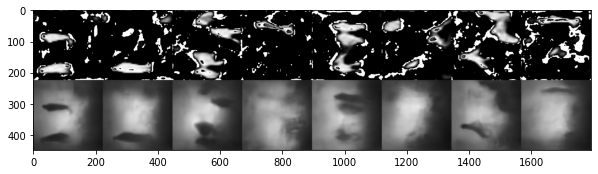

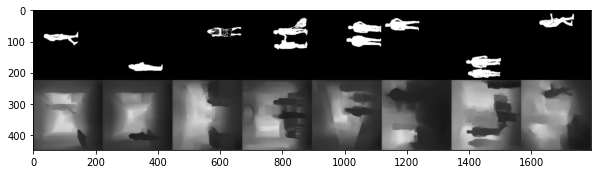

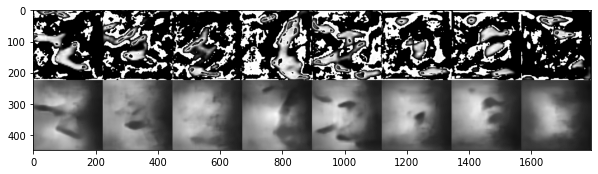

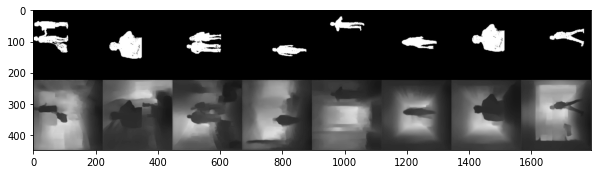

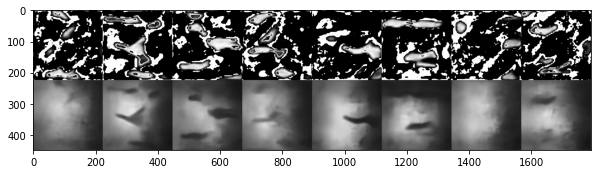

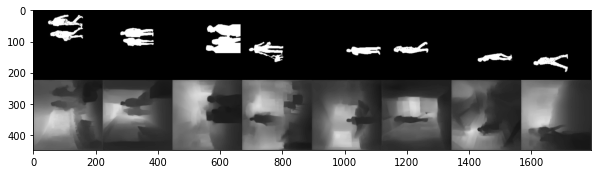

In [0]:
mmdtraintest.display_samples(expand_model, train_loader, device)

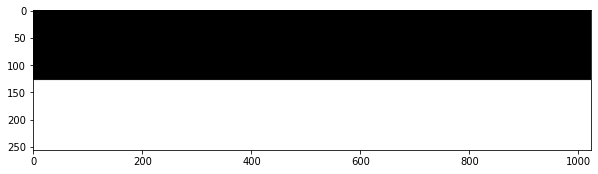

In [0]:
img = iter(test_loader).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")
output_pred = torch.split(output_val,1,dim=1)
# mask_pred = [kornia.tensor_to_image(((output_pred[0][val].to("cpu")*0.0016620444341229432+0.057950844077600344)*255).byte()) for val in range(8) ]
# depth_pred = [kornia.tensor_to_image(((output_pred[1][val].to("cpu")*0.03551773442719045+0.3679109312239146)*255).byte()) for val in range(8) ]

mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]


img_shape = img['output'][0][1].shape[1]
mask_gt = [img['output'][0][val].reshape(img_shape,img_shape) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(img_shape,img_shape) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

In [0]:
torch.mean(mmdlosses.LocalL1Loss(img['output'][0][1], output_pred[0][1]))

tensor(12.1142)

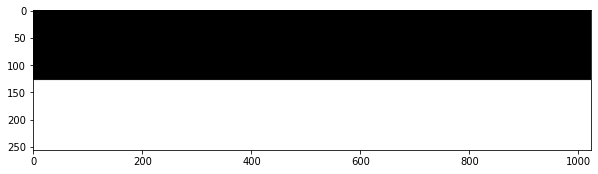

In [0]:
img = iter(train_loader).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")
output_pred = torch.split(output_val,1,dim=1)
# mask_pred = [kornia.tensor_to_image(((output_pred[0][val].to("cpu")*0.0016620444341229432+0.057950844077600344)*255).byte()) for val in range(8) ]
# depth_pred = [kornia.tensor_to_image(((output_pred[1][val].to("cpu")*0.03551773442719045+0.3679109312239146)*255).byte()) for val in range(8) ]

mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]


img_shape = img['output'][0][1].shape[1]
mask_gt = [img['output'][0][val].reshape(img_shape,img_shape) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(img_shape,img_shape) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

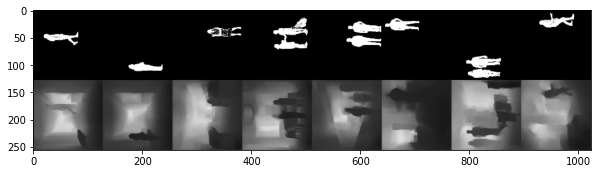

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

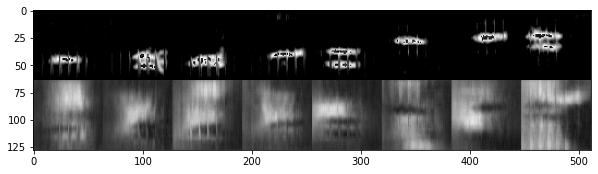

In [0]:
# plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

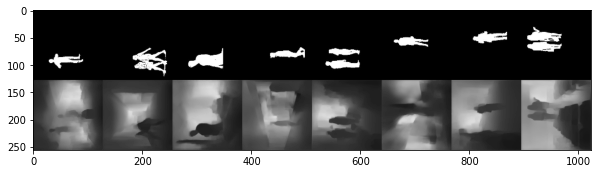

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

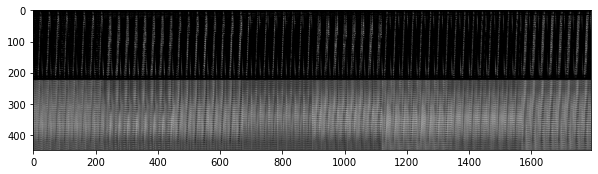

In [0]:
img = iter(train_loader_224).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")

output_pred = torch.split(output_val,1,dim=1)
mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]
mask_gt = [img['output'][0][val].reshape(224,224) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(224,224) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')


### bce_dice_with_rmse_ssim

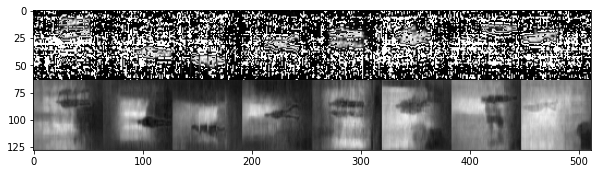

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

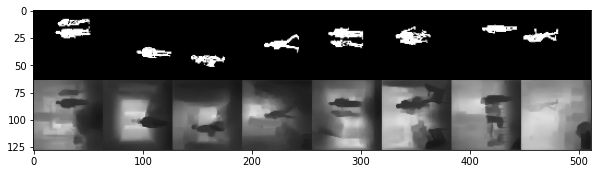

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

In [0]:
plt.imshow(np.hstack([img['output'][1][offset].reshape(64,64),   depth_pred[offset]]),cmap='gray')

## bce_with_rmse

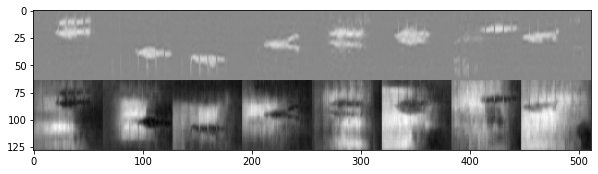

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

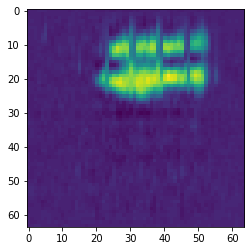

In [0]:
plt.imshow(mask_pred[0])

In [0]:
dice_loss(img['output'][0], output_pred[0])

tensor(0.8533)

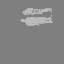

In [0]:
Image.fromarray(kornia.tensor_to_image(((torch.sigmoid(img['output'][0])*255).byte()[0])))

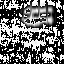

In [0]:
Image.fromarray(kornia.tensor_to_image(((output_pred[0]*255).byte()[0])))

In [0]:
Image.fromarray(kornia.tensor_to_image(((torch.sigmoid(output_pred[0])*255).byte()[0])))

In [0]:
kornia.losses.dice_loss((img['output'][0]*255), (output_pred[0]*255))

In [0]:
output_pred[0].shape

torch.Size([64, 1, 64, 64])

In [0]:
dice_loss(img['output'][0][0], output_pred[0][0])

tensor(0.8170)

In [0]:
def dice_loss(input, target):
    input = torch.sigmoid(input)
    smooth = 1.
    
    iflat = input.view(-1)
    tflat = target.contiguous().view(-1)#reshape(64*64*64)
    #target.view(-1)
    intersection = (iflat * tflat).sum()
    
    return 1 - ((2. * intersection + smooth) /
              (iflat.sum() + tflat.sum() + smooth))

In [0]:
nn.BCEWithLogitsLoss()(img['output'][0], output_pred[0])

tensor(0.6849)

In [0]:
len(mask_pred)

8

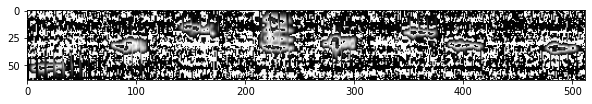

In [0]:
#Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(mask_pred),cmap='gray')

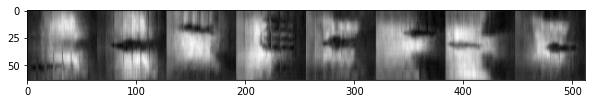

In [0]:
#Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(depth_pred),cmap='gray')#

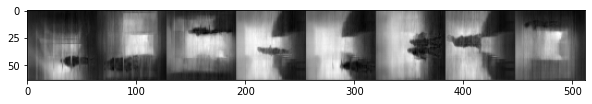

In [0]:


Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(depth_pred),cmap='gray')#

In [0]:
!pip install kornia

     |████████████████████████████████| 163kB 6.0MB/s 


In [0]:
for zip(img['input'][0],img['input'][1])

In [0]:
np.concatenate((img['input'][0][0].numpy(),img['input'][0][1].numpy()), axis=2).shape

(250, 250, 6)

In [0]:
 
pbar = tqdm(depth_dataset)

#bg_mean = np.zeros((4,3))
n, mean, M2 = (0.0,0.0,0.0)
for i_batch,img in enumerate(pbar):
    #img = depth_dataset[i_batch]
    #img_mean = np.mean(img, axis=(0,1))
    img_mean = np.array([ np.mean(iter_val/255.0,axis=(0,1)) for left_k,right_v in img.items() for iter_val in right_v ])
    n, mean, M2 = update_mean_variance((n, mean, M2), img_mean)

print(finalize_mean_variance(n, mean, M2))

In [0]:
# hf = h5py.File('data7.h5', 'w')
# #base_zip = ZipFile('/content/image_mask_gt2k6k.zip')
# #pbar = tqdm(depth_dataset)
# #hf.close()
# def hf_create_dataset(hdf_file, file_name, data):
#     hdf_file.create_dataset(
#                 name=file_name,
#                 data=data,
#                 compression="gzip", compression_opts=9
#                 )
# i_batch=0
# #for i_batch,img in enumerate(pbar):
# start = time.process_time()
# #try:
# for img in depth_dataset:
#     #key_name = 
#     if(i_batch > 100000):
#         break
#     #val_arr = [iter_val 
#     for left_k,right_v in img.items():
#         for inner_k, iter_val in right_v.items():
#             #print(inner_k)
#             hf_create_dataset(hf, inner_k ,iter_val)

#     if(i_batch % 1000 == 0 and i_batch > 1000):
#         current = time.process_time()
#         print("No:of records processed:{} Time Elapsed:{}".format(i_batch, current-start))
#     i_batch += 1

# end = time.process_time()
# print("No:of records processed:{} Time Elapsed:{}".format(i_batch, end-start))
# #except:

# #    hf.close()

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

In [0]:
hf.close()

In [0]:
hf_read = h5py.File('data7.h5', 'r')

In [0]:
hf_read.keys()

<KeysViewHDF5 ['depth_image_023aa22186_classroom_1.jpg', 'depth_image_0ccf0b6adb_classroom_8.jpg', 'depth_image_0d06379c4e_classroom_12.jpg', 'depth_image_100078863e_classroom_10.jpg', 'depth_image_1000d68e48_classroom_2.jpg', 'depth_image_10023ed777_classroom_12.jpg', 'depth_image_10027aa3fa_classroom_4.jpg', 'depth_image_1002953763_classroom_1.jpg', 'depth_image_1002a448f4_classroom_10.jpg', 'depth_image_1002be3508_classroom_3.jpg', 'depth_image_1002e52563_classroom_14.jpg', 'depth_image_1002e75f62_classroom_15.jpg', 'depth_image_100317e99d_classroom_14.jpg', 'depth_image_1003212d72_classroom_8.jpg', 'depth_image_10033c4a69_classroom_8.jpg', 'depth_image_10038181d7_classroom_3.jpg', 'depth_image_1003ffcca2_classroom_10.jpg', 'depth_image_1004993b2d_classroom_13.jpg', 'depth_image_1004dd5dd3_classroom_16.jpg', 'depth_image_100659c8dd_classroom_17.jpg', 'depth_image_1006609a43_classroom_16.jpg', 'depth_image_10074a3520_classroom_8.jpg', 'depth_image_1007f75489_classroom_8.jpg', 'depth_

In [0]:
### Knuth/Welford algorithm to generate mean by addition of new samples to existing mean

def update_mean_variance(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2

    return (count, mean, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize_mean_variance(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count < 2:
        return float('nan')
    else:
       (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1))
       return (mean, variance, sampleVariance)

In [0]:
calc_mean,variance, _ = finalize_mean_variance((n, mean, M2))
print(calc_mean)
print(np.sqrt(variance))

[[0.56632738 0.51567622 0.45670792]
 [0.57469445 0.52241555 0.45992244]
 [0.05795104 0.05795104 0.05795104]
 [0.61635181 0.21432114 0.50569604]]
[[0.1076622  0.10650349 0.12808967]
 [0.11322354 0.11195428 0.13441683]
 [0.02640032 0.02640032 0.02640032]
 [0.09193359 0.07619106 0.04919082]]


In [0]:
#depth_map = np.hstack([depth_dataset[index_val]['output'][1] for index_val in myrandom_array])
depth_map = [depth_dataset[index_val]['output'][1] for index_val in myrandom_array]
mask_image = [depth_dataset[index_val]['output'][0] for index_val in myrandom_array]
bg_image = [depth_dataset[index_val]['input'][1] for index_val in myrandom_array]
fg_bg_image = [depth_dataset[index_val]['input'][0] for index_val in myrandom_array]
final_list = np.hstack([ mask_image, bg_image, fg_bg_image])

In [0]:
from matplotlib import pyplot as plt

In [0]:
plt.figure(figsize=(24,32))
plt.imshow(depth_map,cmap='gray')

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 20),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, depth_map):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [0]:
plt.savefig('/content/drive/My Drive/EVA4/tsai/S15EVA4/depthmaptile.png')

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 20),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, final_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [0]:
Image.fromarray(depth_dataset[0]['output'][0])

In [0]:
Image.fromarray(depth_dataset[0]['output'][1])

In [0]:
import glob
fileList = [file_name for file_name in glob.glob('/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/*png')]
print("Number of images of people:{}".format(len(fileList)))

Number of images of people:110


In [0]:
import os

for file_name in fileList:
    image_name = os.path.basename(file_name)
    my_array = np.array(Image.open(file_name))
    print("FileName: {} Shape:{}".format(image_name, my_array.shape))

In [0]:
base_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/'
aug_path = '/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/aug_images'
image_list = [ ]


for file_name in glob.glob(base_dir+"/*png")[:20]:
    basefile_name = os.path.basename(file_name)
    #print(basefile_name)
    mask_name = os.path.join(aug_path,"mask_"+basefile_name)
    flip_name = os.path.join(aug_path,"flip_"+basefile_name)
    flip_mask_name = os.path.join(aug_path,"mask_"+os.path.basename(flip_name))
    print(file_name,mask_name,flip_name,  flip_mask_name)
    image_list.append([np.array(Image.open(val)) for val in [file_name,mask_name,flip_name,  flip_mask_name ]])

In [0]:
for val in image_list:
    plt.imshow(np.hstack([val[0],val[2]]))
    plt.imshow(np.hstack([val[1],val[3]]))

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
#for iter in image_list:
for ax, im in zip(grid, image_list[2]):
    #print(ax., )
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [0]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [0]:
model.summary()

In [0]:
#csv_file = '/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetSample.csv'
batch_start = 90000
batch_end = batch_start+30000

test_batch_start = 512
test_batch_end = test_batch_start + 1512
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
size_hw = (128,128)
depth_dataset = mmddataloader.DepthMaskDataSet(csv_file, root_dir, batch_start,batch_end, read_zip=True,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                  transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                  transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':1,'pin_memory': True}
train_loader = DataLoader(depth_dataset, batch_size=64, shuffle=False, **kwargs)

test_dataset = mmddataloader.DepthMaskDataSet(csv_file, root_dir, test_batch_start,test_batch_end,read_zip=True,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':1,'pin_memory': True}
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, **kwargs)